In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Libraries imported sucessfully')

Libraries imported sucessfully


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 16

### Load the dataset

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')
df[:3]

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [5]:
# Shape 
df.shape

(400, 5)

In [6]:
# Summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
# Description
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
# Check null value
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
# Check duplicat
df.duplicated().sum()

0

In [11]:
#First 5 rows
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
# Last five rows
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


### EDA

##### Count the number female and male

In [14]:
plt.style.use('fivethirtyeight')

In [15]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

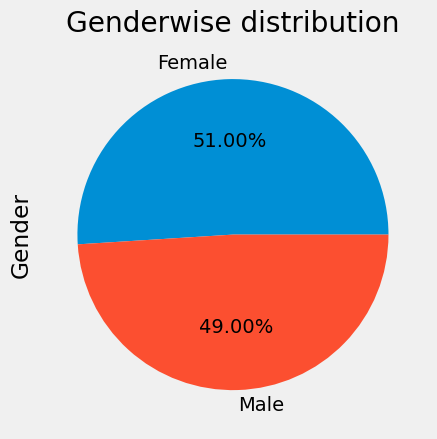

In [16]:
df.Gender.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Genderwise distribution')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

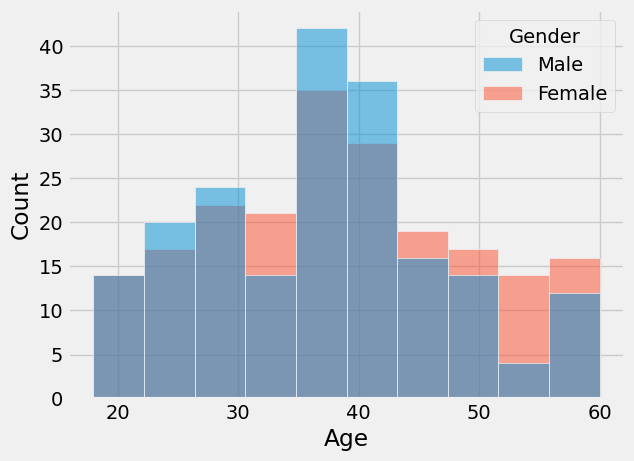

In [17]:
sns.histplot(data=df,x='Age',hue='Gender')

<AxesSubplot:xlabel='Age', ylabel='Density'>

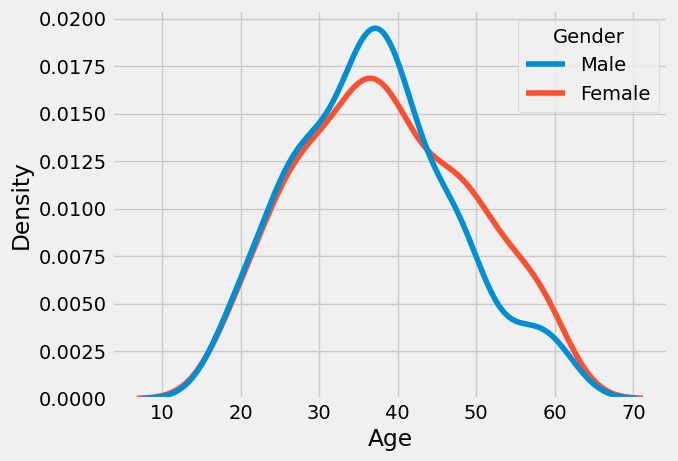

In [20]:
sns.kdeplot(data=df,x='Age',hue='Gender')

Text(0.5, 1.0, 'Relation between age and estimated salary hued by gender')

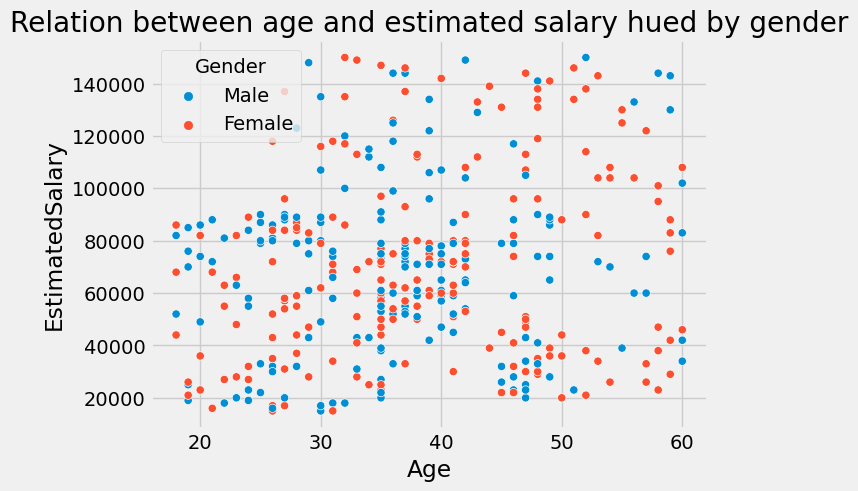

In [24]:
sns.scatterplot(data=df,y='EstimatedSalary',x='Age',hue='Gender')
plt.title('Relation between age and estimated salary hued by gender')

In [25]:
# MAximum salary
df.EstimatedSalary.max()

150000

In [26]:
# Minimum salary
df.EstimatedSalary.min()

15000

In [34]:
# Salary by gender
df[['EstimatedSalary','Gender']].min()

EstimatedSalary     15000
Gender             Female
dtype: object

In [35]:
df[['EstimatedSalary','Gender']].max()

EstimatedSalary    150000
Gender               Male
dtype: object

In [36]:
# Genderwise minimum salary
df.groupby('Gender').min()

,User ID,Age,EstimatedSalary,Purchased
Gender,,,,
Female,15566689,18,15000,0
Male,15570932,18,15000,0


In [38]:
# Genderwise maximum salary
df.groupby('Gender').max()

,User ID,Age,EstimatedSalary,Purchased
Gender,,,,
Female,15815236,60,150000,1
Male,15814816,60,150000,1


In [39]:
# Count how many has purchased
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [44]:
df.groupby(['Purchased'])['Gender'].value_counts()

Purchased  Gender
0          Male      130
           Female    127
1          Female     77
           Male       66
Name: Gender, dtype: int64

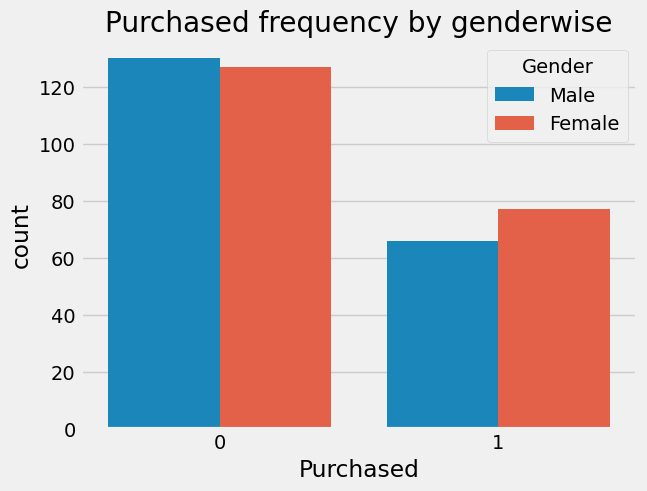

In [45]:
sns.countplot(data=df,x='Purchased',hue='Gender')
plt.title('Purchased frequency by genderwise')
plt.show()

From above maximum are not purchased.

Female percentage is more in case of purchase.

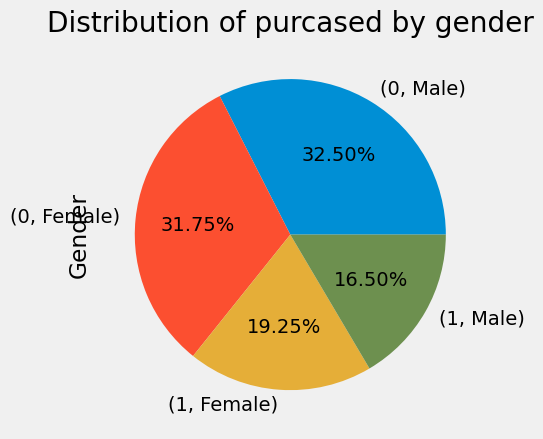

In [47]:
df.groupby(['Purchased'])['Gender'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Distribution of purcased by gender')
plt.show()

In [51]:
# Now finding salaray of purchased
buy = df.groupby('Purchased').get_group(1)
buy

,User ID,Gender,Age,EstimatedSalary,Purchased
7,15694829,Female,32,150000,1
16,15733883,Male,47,25000,1
17,15617482,Male,45,26000,1
18,15704583,Male,46,28000,1
19,15621083,Female,48,29000,1
...,...,...,...,...,...
393,15635893,Male,60,42000,1
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1


In [52]:
# Purchased whose minimum salary is
buy.EstimatedSalary.min()

20000

In [53]:
# Purchased whose minimum age is
buy.Age.min()

27

#### Check the oulier

<AxesSubplot:xlabel='Age'>

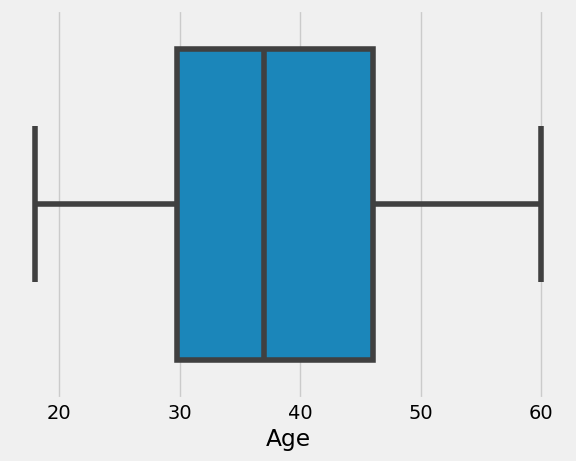

In [56]:
sns.boxplot(data=df,x='Age')

<AxesSubplot:xlabel='EstimatedSalary'>

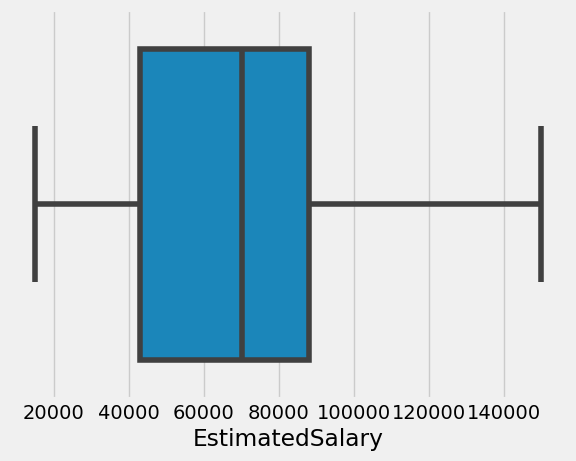

In [57]:
sns.boxplot(data=df,x='EstimatedSalary')

In [61]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [62]:
df.drop(labels='User ID',axis=1,inplace=True)
df[:3]

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0


### Preprocessing

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
lb = LabelEncoder()

In [63]:
lb.fit(df['Gender'])

LabelEncoder()

In [64]:
lb.transform(df.Gender)

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,

In [65]:
lb.classes_

array(['Female', 'Male'], dtype=object)

In [66]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [67]:
df['Gender'] = lb.fit_transform(df['Gender'])

In [68]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


### Splitting the dataset

In [69]:
# Input
X = df.loc[:,['Gender','Age','EstimatedSalary']]
X[:3]

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000


In [71]:
# output 
y=df.Purchased
y[:3]

0    0
1    0
2    0
Name: Purchased, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#### Training data

In [74]:
len(X_train)

320

In [75]:
len(y_train)

320

#### Testing data

In [76]:
len(X_test)

80

In [77]:
len(y_test)

80

## Load the algorithm

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
model = LogisticRegression()

#### Training the data

In [80]:
model.fit(X_train,y_train)

LogisticRegression()

#### Check traing score

In [81]:
model.score(X_train,y_train)*100

62.81250000000001

#### So the training score is very less will go for Feature Scaling

## Feature Scaling

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

In [84]:
scaler.fit(X_train)

StandardScaler()

In [85]:
scaler.transform(X_train)

array([[ 1.00000000e+00, -1.95360871e-01,  8.01557432e-01],
       [ 1.00000000e+00,  7.76886078e-01, -1.37872182e+00],
       [ 1.00000000e+00,  2.90762603e-01, -3.45957961e-01],
       [ 1.00000000e+00, -3.89810261e-01,  1.26056359e+00],
       [ 1.00000000e+00,  3.87987298e-01, -2.02518537e-01],
       [-1.00000000e+00, -1.84818068e+00, -1.29265816e+00],
       [-1.00000000e+00, -9.11481515e-04, -6.04148925e-01],
       [ 1.00000000e+00, -4.87034956e-01, -8.04964119e-01],
       [-1.00000000e+00,  1.45745894e+00,  9.44996857e-01],
       [-1.00000000e+00, -1.16760782e+00, -1.03446720e+00],
       [-1.00000000e+00,  9.63132134e-02,  5.56724265e-02],
       [-1.00000000e+00, -9.11481515e-04, -4.60709501e-01],
       [ 1.00000000e+00, -7.78709041e-01, -1.60822489e+00],
       [-1.00000000e+00,  9.63132134e-02,  2.27799736e-01],
       [ 1.00000000e+00,  1.06856016e+00, -1.73830652e-01],
       [-1.00000000e+00,  1.36023425e+00,  1.92038494e+00],
       [-1.00000000e+00,  9.71335467e-01

In [86]:
X_train_ = scaler.transform(X_train)
X_test_ = scaler.transform(X_test)

In [88]:
lr = LogisticRegression()

In [89]:
lr.fit(X_train_,y_train)
lr.score(X_train_,y_train)*100

85.625

### The training score is improved compared to previous so we can proceed further.

In [90]:
# Testing score
lr.score(X_test_,y_test)*100

83.75

### Testing Phase

In [91]:
# Predicted result
y_pred = lr.predict(X_test_)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [92]:
# Actual result
y_test

202    1
144    0
140    0
153    0
17     1
      ..
162    0
305    0
327    0
260    0
343    1
Name: Purchased, Length: 80, dtype: int64

### As clasification problem we need to use confusion matrix and other score

In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
cm = confusion_matrix(y_test,y_pred)

In [95]:
cm

array([[51,  5],
       [ 8, 16]], dtype=int64)

Text(21.78333333333333, 0.5, 'Actual output')

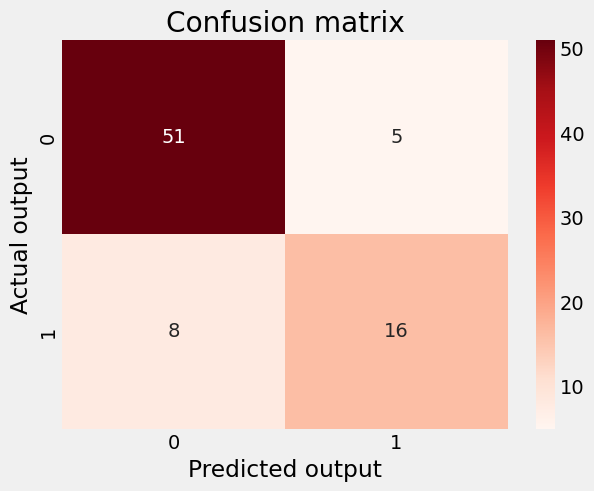

In [96]:
sns.heatmap(data=cm,cmap='Reds',annot =True)
plt.title('Confusion matrix')
plt.xlabel('Predicted output')
plt.ylabel('Actual output')

In [97]:
from sklearn.metrics import precision_score,recall_score,r2_score,f1_score,accuracy_score,classification_report

In [98]:
# Precision
print('The precision score is',precision_score(y_test,y_pred)*100)

The precision score is 76.19047619047619


In [99]:
# recall
print('The recall score is',recall_score(y_test,y_pred)*100)

The recall score is 66.66666666666666


In [100]:
# r2_score
print('The r2 score is',r2_score(y_test,y_pred)*100)

The r2 score is 22.619047619047606


In [101]:
# f1_score
print('The f1 score is',f1_score(y_test,y_pred)*100)

The f1 score is 71.11111111111111


In [102]:
# Accuracy_score
print('The accuracy score is',accuracy_score(y_test,y_pred)*100)

The accuracy score is 83.75


In [103]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        56
           1       0.76      0.67      0.71        24

    accuracy                           0.84        80
   macro avg       0.81      0.79      0.80        80
weighted avg       0.83      0.84      0.83        80



#### Not purchased

In [104]:
# Actual
sum(y_test == 0)

56

In [105]:
# Predicted
sum(y_pred == 0)

59

#### Purchased

In [106]:
# Actual
sum(y_test == 1)

24

In [107]:
# Predicted
sum(y_pred == 1)

21